In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
#Getting information of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Ad 1     10000 non-null int64
Ad 2     10000 non-null int64
Ad 3     10000 non-null int64
Ad 4     10000 non-null int64
Ad 5     10000 non-null int64
Ad 6     10000 non-null int64
Ad 7     10000 non-null int64
Ad 8     10000 non-null int64
Ad 9     10000 non-null int64
Ad 10    10000 non-null int64
dtypes: int64(10)
memory usage: 781.3 KB


In [4]:
#Getting details of data
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad 1,10000.0,0.1703,0.375915,0.0,0.0,0.0,0.0,1.0
Ad 2,10000.0,0.1295,0.335769,0.0,0.0,0.0,0.0,1.0
Ad 3,10000.0,0.0728,0.259821,0.0,0.0,0.0,0.0,1.0
Ad 4,10000.0,0.1196,0.324509,0.0,0.0,0.0,0.0,1.0
Ad 5,10000.0,0.2695,0.443722,0.0,0.0,0.0,1.0,1.0
Ad 6,10000.0,0.0126,0.111546,0.0,0.0,0.0,0.0,1.0
Ad 7,10000.0,0.1112,0.314395,0.0,0.0,0.0,0.0,1.0
Ad 8,10000.0,0.2091,0.406686,0.0,0.0,0.0,0.0,1.0
Ad 9,10000.0,0.0952,0.293506,0.0,0.0,0.0,0.0,1.0
Ad 10,10000.0,0.0489,0.215670,0.0,0.0,0.0,0.0,1.0


In [5]:
# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []

#counts of 1-rewards and 0-rewards for each ad
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
		#make a draw from the ad's beta distribution
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
		#choose ad with highest value as selected from its beta distribution
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

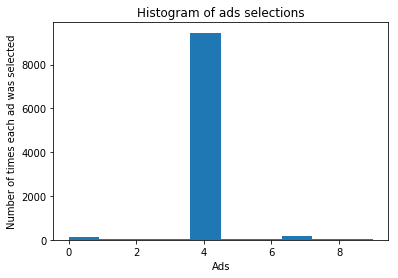

In [6]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()